In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression as LR
%matplotlib inline

In [188]:
url="https://www.fueleconomy.gov/feg/EPAGreenGuide/Smartway/xls/SmartWay%20Vehicle%20List%20for%20MY%202017.xlsx"
#data=pd.read_excel(url) 
data=pd.read_csv(r'C:/Users/Priyanka/Documents/Marquette/DM/Assignments/Project/auto-mpg.csv')               

In [189]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [190]:
data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [191]:
#print(sorted(data["horsepower"].round().unique()))
np.sort(data.horsepower.unique())
#data.describe().round(2)

array([  46.,   48.,   49.,   52.,   53.,   54.,   58.,   60.,   61.,
         62.,   63.,   64.,   65.,   66.,   67.,   68.,   69.,   70.,
         71.,   72.,   74.,   75.,   76.,   77.,   78.,   79.,   80.,
         81.,   82.,   83.,   84.,   85.,   86.,   87.,   88.,   89.,
         90.,   91.,   92.,   93.,   94.,   95.,   96.,   97.,   98.,
        100.,  102.,  103.,  105.,  107.,  108.,  110.,  112.,  113.,
        115.,  116.,  120.,  122.,  125.,  129.,  130.,  132.,  133.,
        135.,  137.,  138.,  139.,  140.,  142.,  145.,  148.,  149.,
        150.,  152.,  153.,  155.,  158.,  160.,  165.,  167.,  170.,
        175.,  180.,  190.,  193.,  198.,  200.,  208.,  210.,  215.,
        220.,  225.,  230.,   nan])

In [192]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


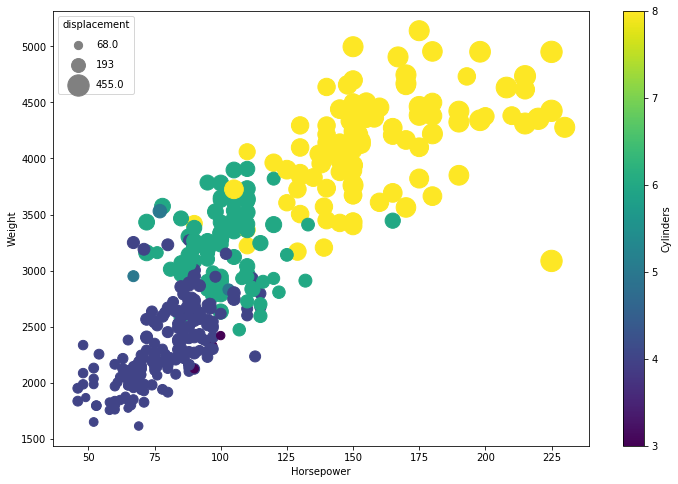

In [193]:
plt.figure(figsize=(12,8))
plt.scatter(data["horsepower"],data["weight"],c=data["cylinders"],s=data["displacement"],label='')

#sns.lmplot("horsepower","weight",data=data,hue="cylinders")
plt.xlabel("Horsepower")
plt.ylabel("Weight")
plt.colorbar(label="Cylinders")
dpl=[np.min(data["displacement"]),np.mean(data["displacement"]),np.max(data["displacement"])]
for i in dpl:
    plt.scatter([],[],marker='o',c='grey',s=i,label=round(i))
    plt.legend(labelspacing=1,title="displacement")

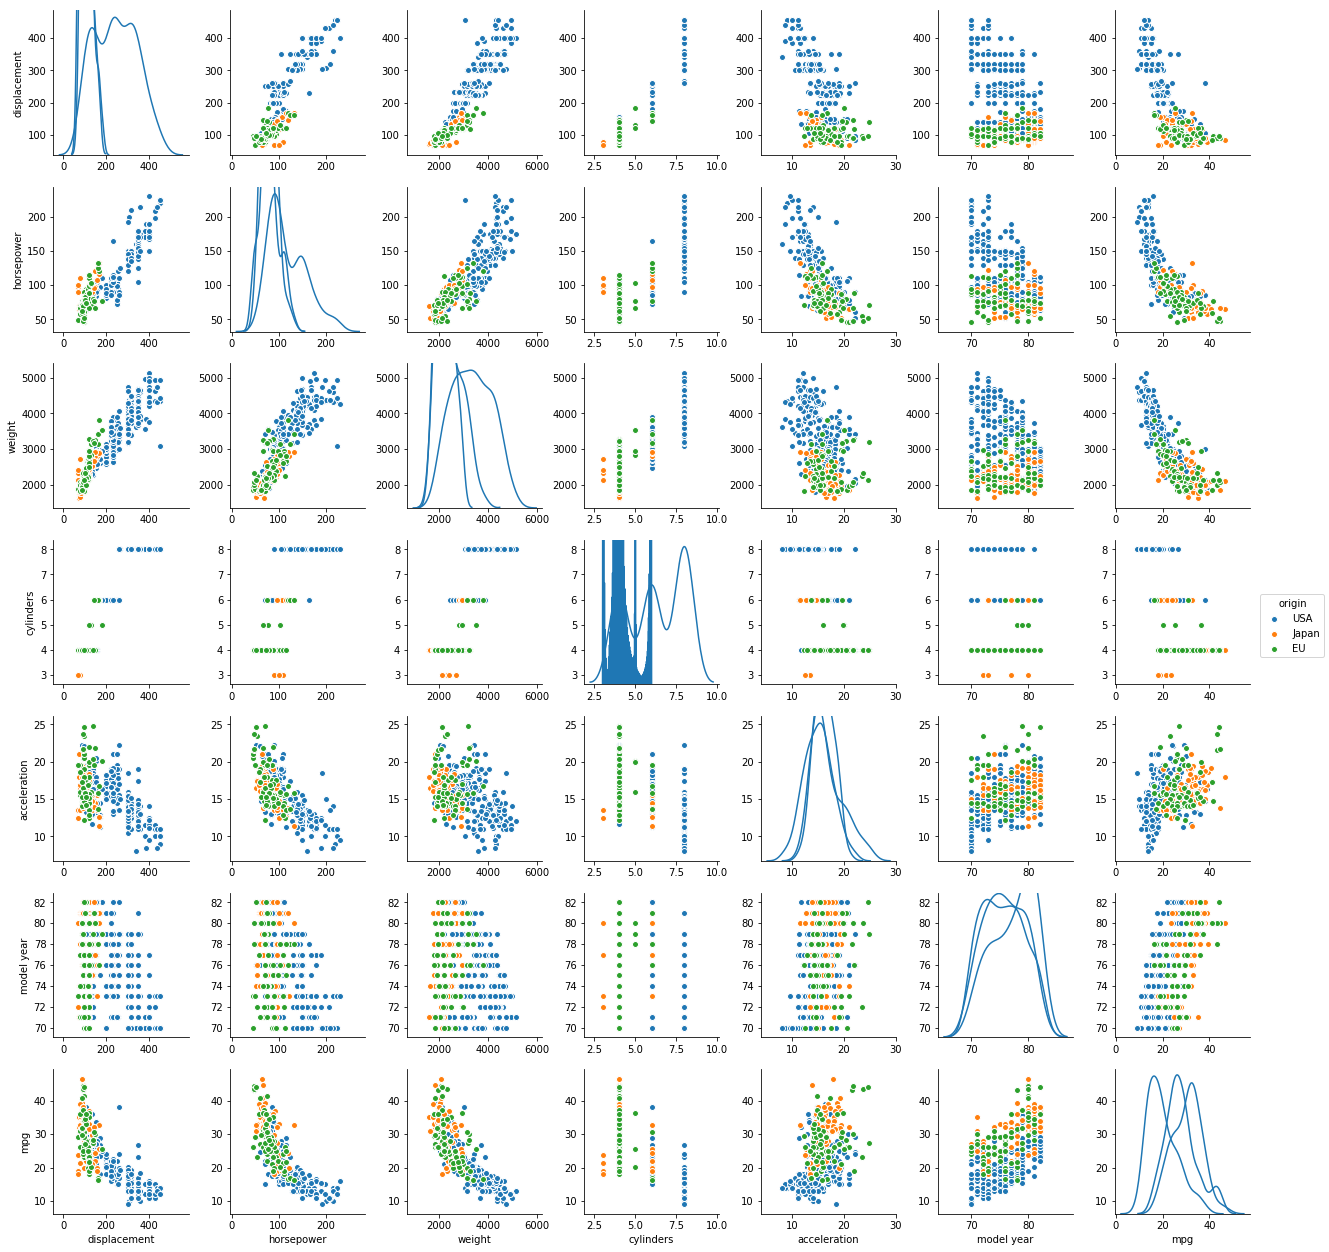

In [386]:
features =['displacement', 'horsepower', 'weight','origin','cylinders','acceleration','model year','mpg']
sns.pairplot(data[features],hue='origin',diag_kind='kde')

In [194]:
#meanhp = data['horsepower'].mean()
#data['horsepower'] = data['horsepower'].fillna(meanhp)
#np.sort(data.horsepower.unique())

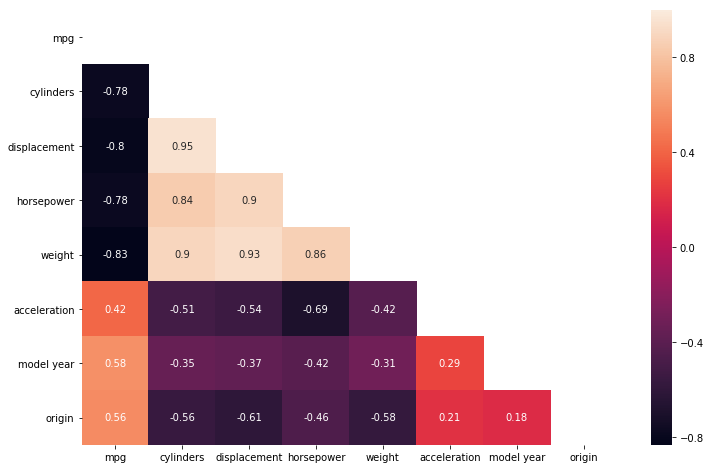

In [195]:
plt.figure(figsize=(12,8))
corr=data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,mask=mask,annot=True)

In [196]:
#Using linear regression to impute missing values of horsepower
weight=data.loc[~data["horsepower"].isnull(),"weight"].values.reshape(-1,1)
hp=data.loc[~data["horsepower"].isnull(),"horsepower"].values.reshape(-1,1)
lr=LR()
lr.fit(weight,hp)
values=lr.predict(data.loc[data["horsepower"].isnull(),"weight"].values.reshape(-1,1)).flatten()
lst=data["horsepower"].isnull()
lst=np.array(lst[lst].index)
for i,j in zip(lst,values):
  data.loc[i,"horsepower"]=j

In [325]:
#data["origin"]=data["origin"].map({1:'USA',2:'EU',3:'Japan'})
data["car name"].unique()
data["brand"],data["model"] = data["car name"].str.split(' ',1).str

(0, 40)

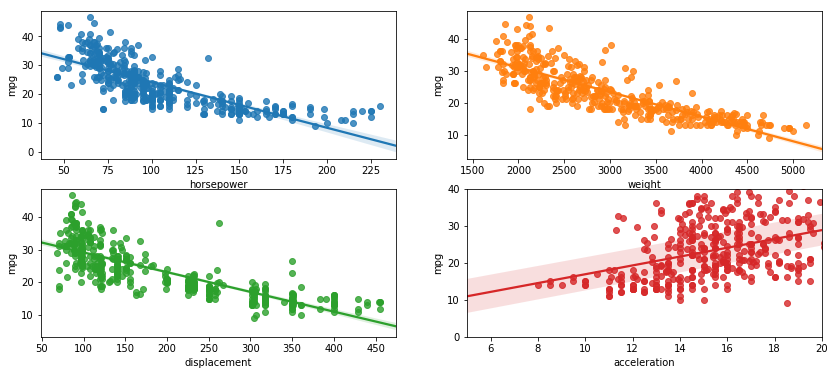

In [375]:
fig=plt.figure()
fig,ax=plt.subplots(2,2,figsize=(14,6))
sns.regplot(data["horsepower"],data["mpg"],ax=ax[0][0])
sns.regplot(data["weight"],data["mpg"],ax=ax[0][1])
sns.regplot(data["displacement"],data["mpg"],ax=ax[1][0])
sns.regplot(data["acceleration"],data["mpg"],ax=ax[1][1])
plt.xlim(5,20)
plt.ylim(0,40)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]), <a list of 37 Text xticklabel objects>)

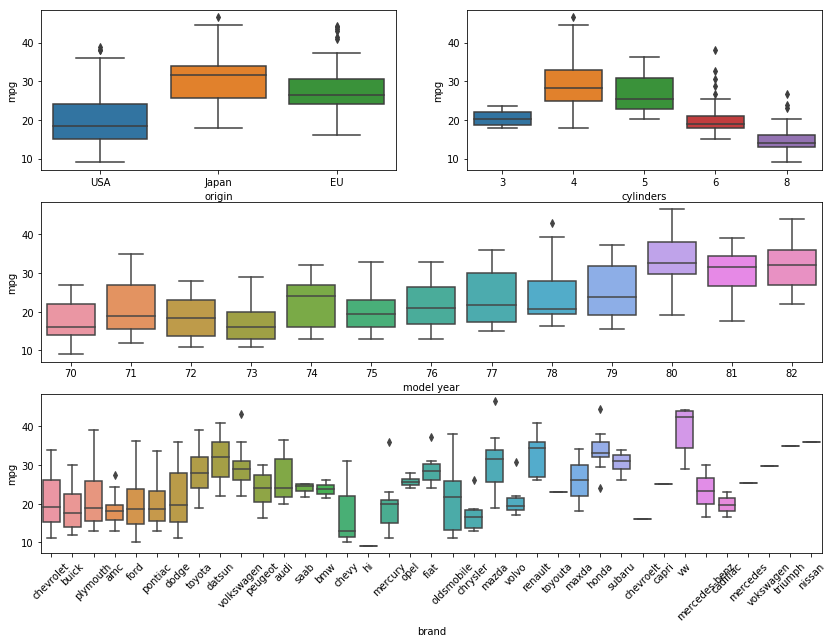

In [383]:
fig=plt.figure()
fig,ax=plt.subplots(figsize=(14,10))
ax1=plt.subplot(321)
ax2=plt.subplot(322)
ax3=plt.subplot(312)
ax4=plt.subplot(313)
sns.boxplot(data["origin"],data["mpg"],ax=ax1)
sns.boxplot(data["cylinders"],data["mpg"],ax=ax2)
sns.boxplot(data["brand"],data["mpg"],ax=ax4)
sns.boxplot(data["model year"],data["mpg"],ax=ax3)
plt.xticks(rotation=45)